In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [4]:
data= pd.read_csv('testdataEP1.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/Crop/District  144 non-null    object 
 1   Year                 144 non-null    int64  
 2   Season               144 non-null    object 
 3   Area (Hectare)       144 non-null    int64  
 4   Production (Tonnes)  144 non-null    int64  
 5   Yield                144 non-null    float64
 6   AS%                  144 non-null    float64
 7   SrAc%                144 non-null    float64
 8   HAc%                 144 non-null    float64
 9   MAc%                 144 non-null    float64
 10  SlAc%                144 non-null    float64
 11  N%                   144 non-null    float64
 12  MAl%                 144 non-null    float64
 13  SlAl%                144 non-null    float64
 14  N                    144 non-null    object 
 15  OC                   144 non-null    obj

In [6]:

for col in data:
    print(data[col].name,data[col].nunique())

State/Crop/District 27
Year 5
Season 2
Area (Hectare) 130
Production (Tonnes) 121
Yield  115
AS% 20
SrAc% 17
HAc% 31
MAc% 50
SlAc% 50
N% 43
MAl% 52
SlAl% 44
N 50
OC 51
P 51
K 50
Zn % 51
Fe % 52
Cu % 45
Mn % 51
B % 52
S % 52
Rainfall 99
Temp_Max 101
Temp_Min 117


In [7]:
data.describe()


,Year,Area (Hectare),Production (Tonnes),Yield,AS%,SrAc%,HAc%,MAc%,SlAc%,N%,MAl%,SlAl%,Rainfall,Temp_Max,Temp_Min
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,99.000000,144.000000,144.000000
mean,201669.618056,41347.909722,84587.631944,1.880903,0.098264,0.316806,4.229931,18.078958,12.724722,1.198333,62.036875,1.315972,1195.273352,35.827083,19.175694
std,111.371739,51624.351502,109711.565026,0.999900,0.104636,0.688873,9.196289,20.325601,12.067021,1.558870,31.781055,1.945797,555.946734,4.870165,1.816379
min,201516.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.880000,0.030000,454.790000,29.230000,12.860000
25%,201617.000000,1515.000000,1297.500000,1.200000,0.030000,0.010000,0.030000,1.390000,3.150000,0.320000,37.040000,0.060000,767.658750,31.887500,18.347500
50%,201667.500000,10590.000000,17250.000000,2.005000,0.060000,0.020000,0.430000,7.690000,6.790000,0.810000,71.260000,0.460000,1071.880000,34.690000,19.430000
75%,201743.250000,72886.500000,146750.000000,2.570000,0.110000,0.160000,1.790000,29.170000,19.910000,1.300000,91.910000,1.440000,1435.462000,40.115000,20.307500
max,201819.000000,180200.000000,423300.000000,4.500000,0.450000,3.540000,40.120000,69.970000,44.990000,7.490000,99.680000,8.630000,2693.125000,45.140000,22.530000


In [8]:
# Labels are the values we want to predict
labels = np.array(data['Yield '])

In [9]:
#set target 
data1= data.drop('Yield ',axis =1)

In [10]:
print(labels)

[1.23 1.75 2.3  0.41 0.21 0.67 0.34 0.41 0.48 0.   0.7  0.46 0.31 1.49
 2.06 2.06 2.26 1.22 2.29 2.13 2.86 0.4  0.82 1.74 1.72 1.72 0.72 2.01
 1.76 1.6  1.17 1.64 2.01 1.35 0.84 2.   1.85 2.04 1.22 1.94 1.8  1.85
 1.53 2.53 2.44 2.41 1.58 2.44 2.5  2.97 2.45 3.67 3.48 4.5  3.05 3.91
 3.08 3.41 0.08 0.27 0.29 0.21 1.21 1.94 2.   1.89 2.67 2.07 2.92 0.25
 0.5  2.4  1.43 1.85 0.88 2.74 0.92 1.16 1.13 0.86 1.45 2.03 2.12 1.71
 0.1  0.19 0.29 2.3  2.86 2.91 2.42 1.85 2.52 1.76 2.64 0.2  0.2  1.97
 2.16 2.38 1.83 2.93 3.14 2.72 3.05 2.71 3.16 2.83 3.18 2.45 3.14 2.5
 2.98 3.45 3.17 3.   1.92 2.55 2.31 2.63 1.51 1.75 1.81 2.32 2.94 2.35
 3.29 2.13 3.25 2.11 2.94 3.01 0.   0.22 0.12 0.09 2.26 2.5  2.72 1.
 1.85 2.08 2.54 2.89]


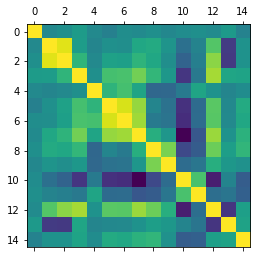

In [11]:
plt.matshow(data.corr())

<AxesSubplot:>

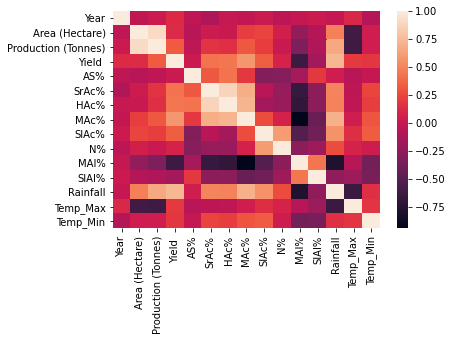

In [12]:

import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [13]:
# Identify categorical columns with low cardinality (a small number of distinct values)
def low_cardinality_cols(data_frame):
    low_cardinality_cols = [cname for cname in data_frame.columns if 
                                data_frame[cname].nunique() < 70 and
                                data_frame[cname].dtype == "object"]
    return(low_cardinality_cols)
  
cat_data_features =low_cardinality_cols(data)

In [14]:
# Identify numeric columns
def numeric_cols(data_frame):
    numeric_cols = [cname for cname in data_frame.columns if 
                                data_frame[cname].dtype in ['int64', 'float64']]
    return(numeric_cols)
  
  
num_data_features = numeric_cols(data)

In [15]:
data_one_hot = pd.get_dummies(data[cat_data_features + num_data_features])
#data_one_hot.replace(-np.inf,np.nan)
data_one_hot = data_one_hot.drop('Yield ',axis = 1)
np.nan_to_num(data_one_hot)

array([[2.01516e+05, 1.40000e+04, 1.72000e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01617e+05, 1.50000e+04, 2.62000e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01718e+05, 1.62000e+04, 3.73000e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.01718e+05, 4.80000e+01, 1.00000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01819e+05, 5.48850e+04, 1.39368e+05, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01819e+05, 3.80000e+01, 1.10000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

<AxesSubplot:>

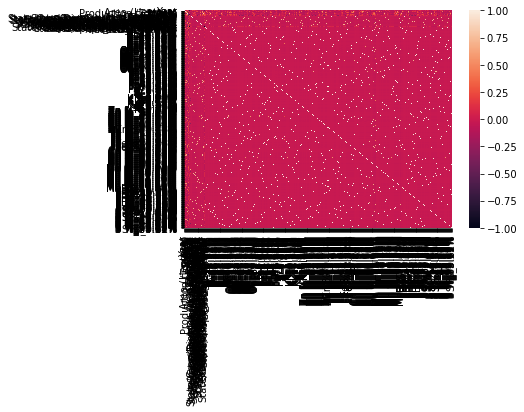

In [16]:
import seaborn as sns
corr = data_one_hot.corr()
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)

In [17]:

data_one_hot.columns

Index(['Year', 'Area (Hectare)', 'Production (Tonnes)', 'AS%', 'SrAc%', 'HAc%',
       'MAc%', 'SlAc%', 'N%', 'MAl%',
       ...
       'S %_60.64%', 'S %_60.92%', 'S %_61.83%', 'S %_64.32%', 'S %_69.80%',
       'S %_70.21%', 'S %_72.09%', 'S %_84.61%', 'S %_85.23%', 'S %_9.62%'],
      dtype='object', length=548)

In [466]:
data1_Train , data1_Test , labels_Train , labels_Test = train_test_split(data_one_hot , labels ,test_size =0.3)

In [467]:
np.nan_to_num(data1_Train)

array([[2.01516e+05, 1.89000e+04, 1.73000e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01819e+05, 7.61060e+04, 2.40930e+05, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01516e+05, 6.20000e+03, 6.00000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.01718e+05, 1.38500e+05, 2.18500e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.01718e+05, 4.80000e+01, 1.00000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.01516e+05, 4.00000e+02, 1.00000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [468]:
np.where(np.isnan(X_Train))
data1_Train=np.nan_to_num(data1_Train)
data1_Test = np.nan_to_num(data1_Test)

In [469]:
labels_Train = np.nan_to_num(labels_Train)
labels_Test = np.nan_to_num(labels_Test)

In [470]:
#Random Forest regressor
model = RandomForestRegressor(max_depth =17, n_estimators =600 ,min_samples_split =4)

In [471]:
np.where(np.isnan(data1_Train))

(array([], dtype=int64), array([], dtype=int64))

In [472]:
model.fit(data1_Train,labels_Train)

RandomForestRegressor(max_depth=17, min_samples_split=4, n_estimators=600)

In [473]:
from sklearn.metrics import mean_absolute_error
Train_accuracy = model.score(data1_Train,labels_Train)
Test_accuracy = model.score(data1_Test,labels_Test)
print('Train_accuracy: ',Train_accuracy)
print('Test accuracy: ',Test_accuracy)

Train_accuracy:  0.941913166211348
Test accuracy:  0.8237133195785433


In [474]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
y_predicted = model.predict(data1_Test)

In [475]:
model.score(data1_Test, labels_Test)

0.8237133195785433